[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pinecone-io/examples/blob/master/learn/generation/langchain/rag-chatbot.ipynb) [![Open nbviewer](https://raw.githubusercontent.com/pinecone-io/examples/master/assets/nbviewer-shield.svg)](https://nbviewer.org/github/pinecone-io/examples/blob/master/learn/generation/langchain/rag-chatbot.ipynb)

# APARAVI x MILVUS - Enterprise Challegne   
Welcome! You made it. We are excited to see what exciting project you will build with our software...

This is the Enterprise UI challenge using the Milvus Vector Data Base Integration (https://milvus.io). 

 ### !A few things to consider!

- Build something small and then extend! There is only little time...
- Consider your hardware limitations. If you are limited in Memory and RAM, try a subset of our sample  data or just upload your own - its a hacknight your POC will be amazing no matter how large the data set - quality is what matters.
- Think about no to vectorize everything. The point of the challenge is to indetify only the impornatn docs/ 


## Resources

- Sample Data Set including HR, Finance, Legal and Health to build some powerul nterpise agents
- Get the aparavi mac or mindwos os onstaler here: 
- Fview the quick installer quide here to get your platirmo running
- you can also access more technical documentation here: https://aparavi-academy.eu/en/getting-started

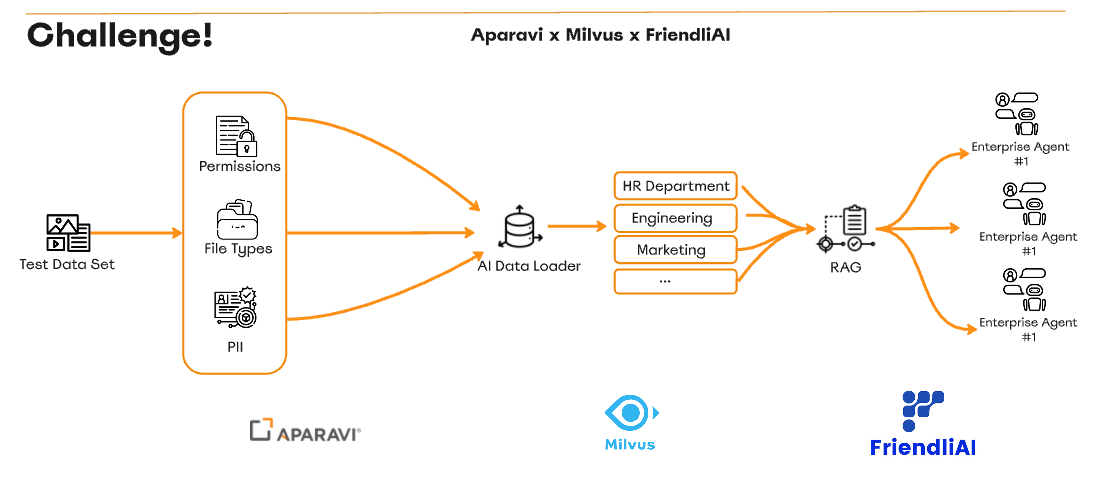

### Once you have installed the platform you should see this screen - navigate to the sources tab.

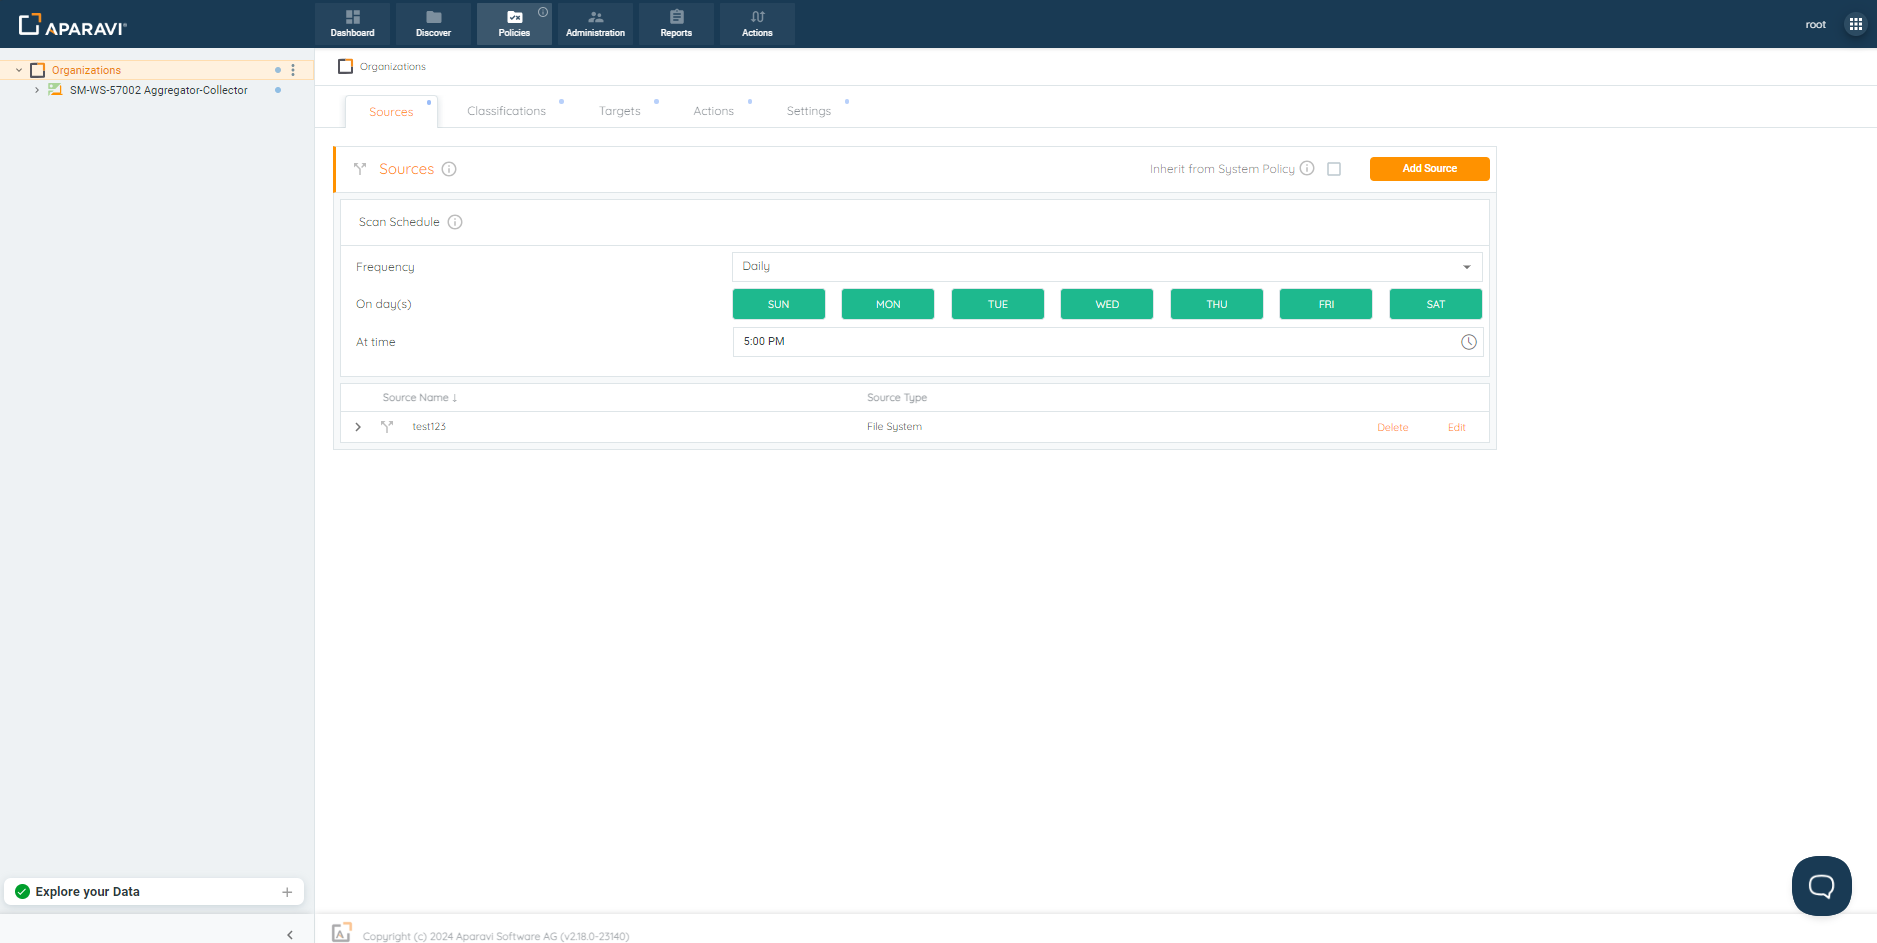

### Unchekc the "Inggerit from System Policy" Box and selcet "Add Source" 

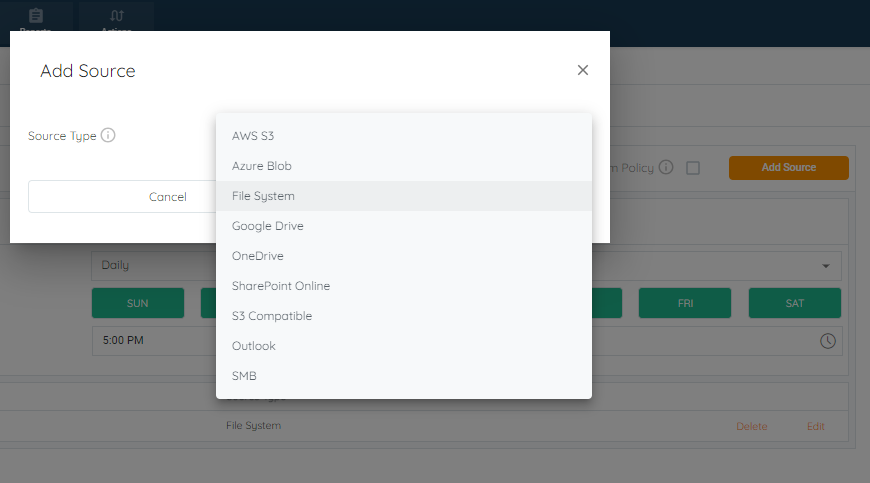

Give your File System Source a meaningfull name and hit "Add Include Path"

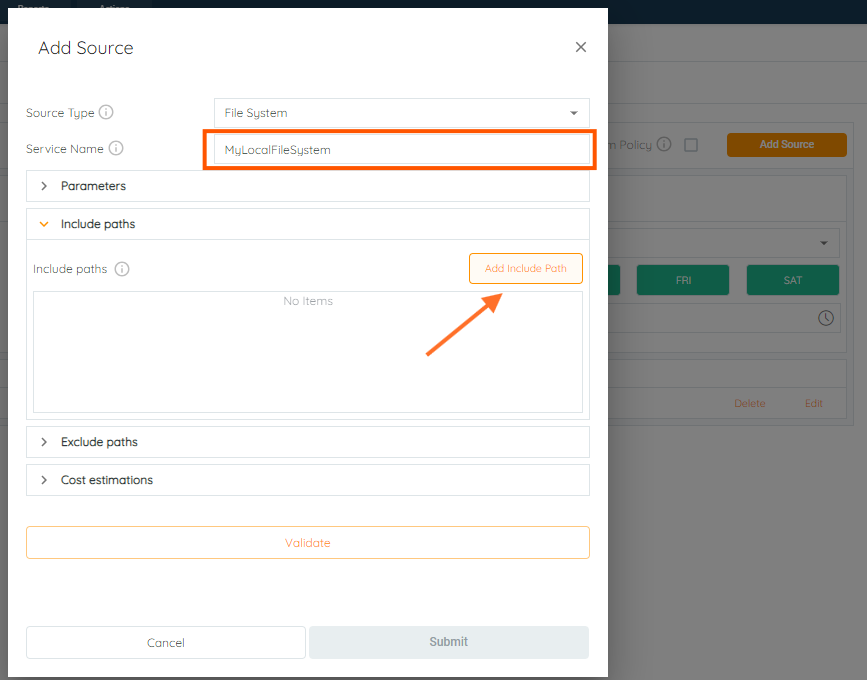

### Enter the Path to you data and enable "Permissions", "Content Signatures", "Enable Indexing" and "Enable Classifications" and click "ok"

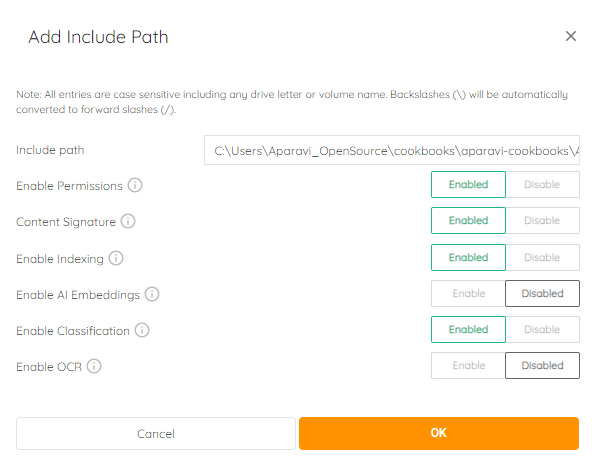

hit validate and submit

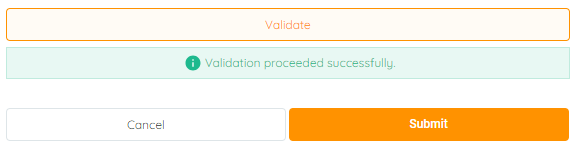

Then hit "Save all Changes" 

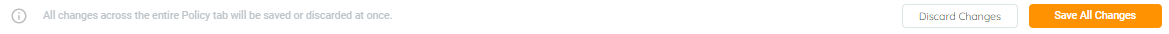

Under the the Dashboard Tab "Status" you should see your scan job running, like this... 

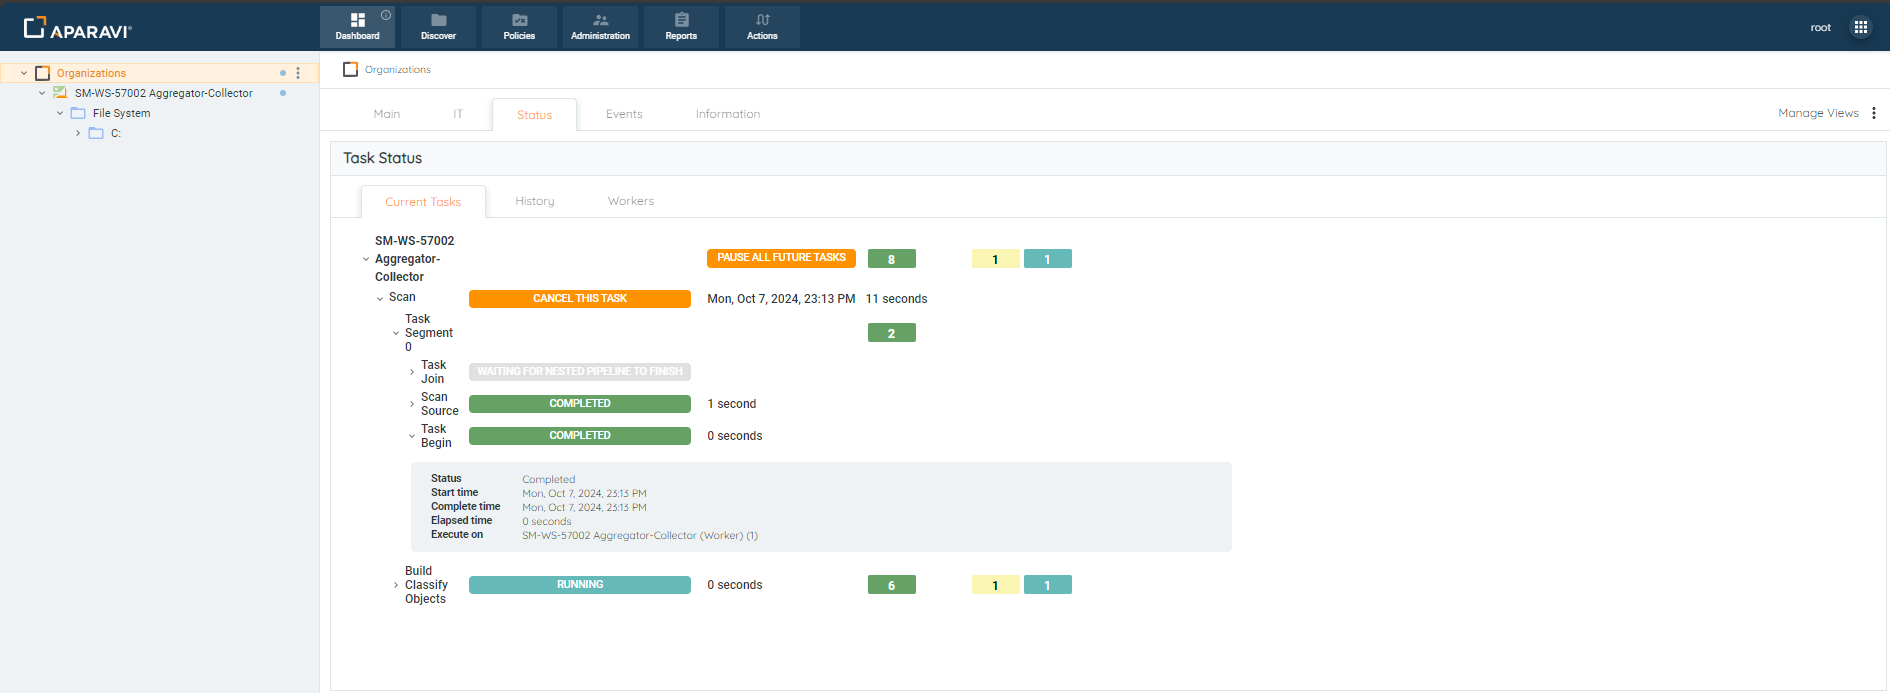

Explore IT Tab on the front page zou can now observe your untructed data unalytics, thigs like you PII count (Personal Identifailve infrmation found, the fuplicates dound in you file as weel as projections on your data grow)

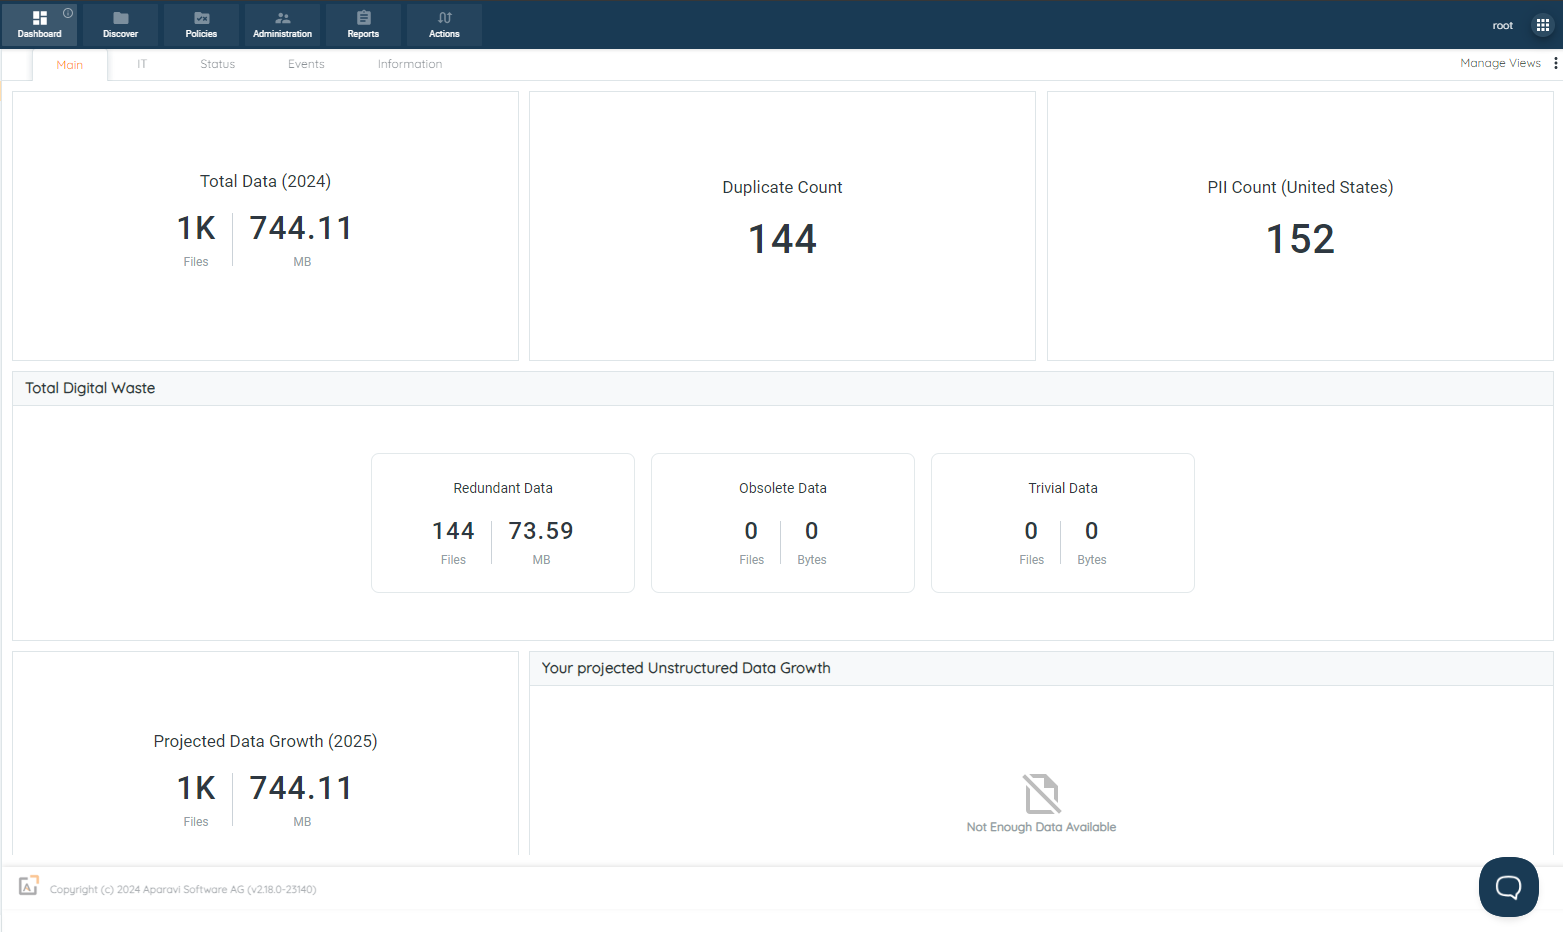

Follwoing that on the IT tab you can see thing like last accessed, filetaig data owners and permissions 

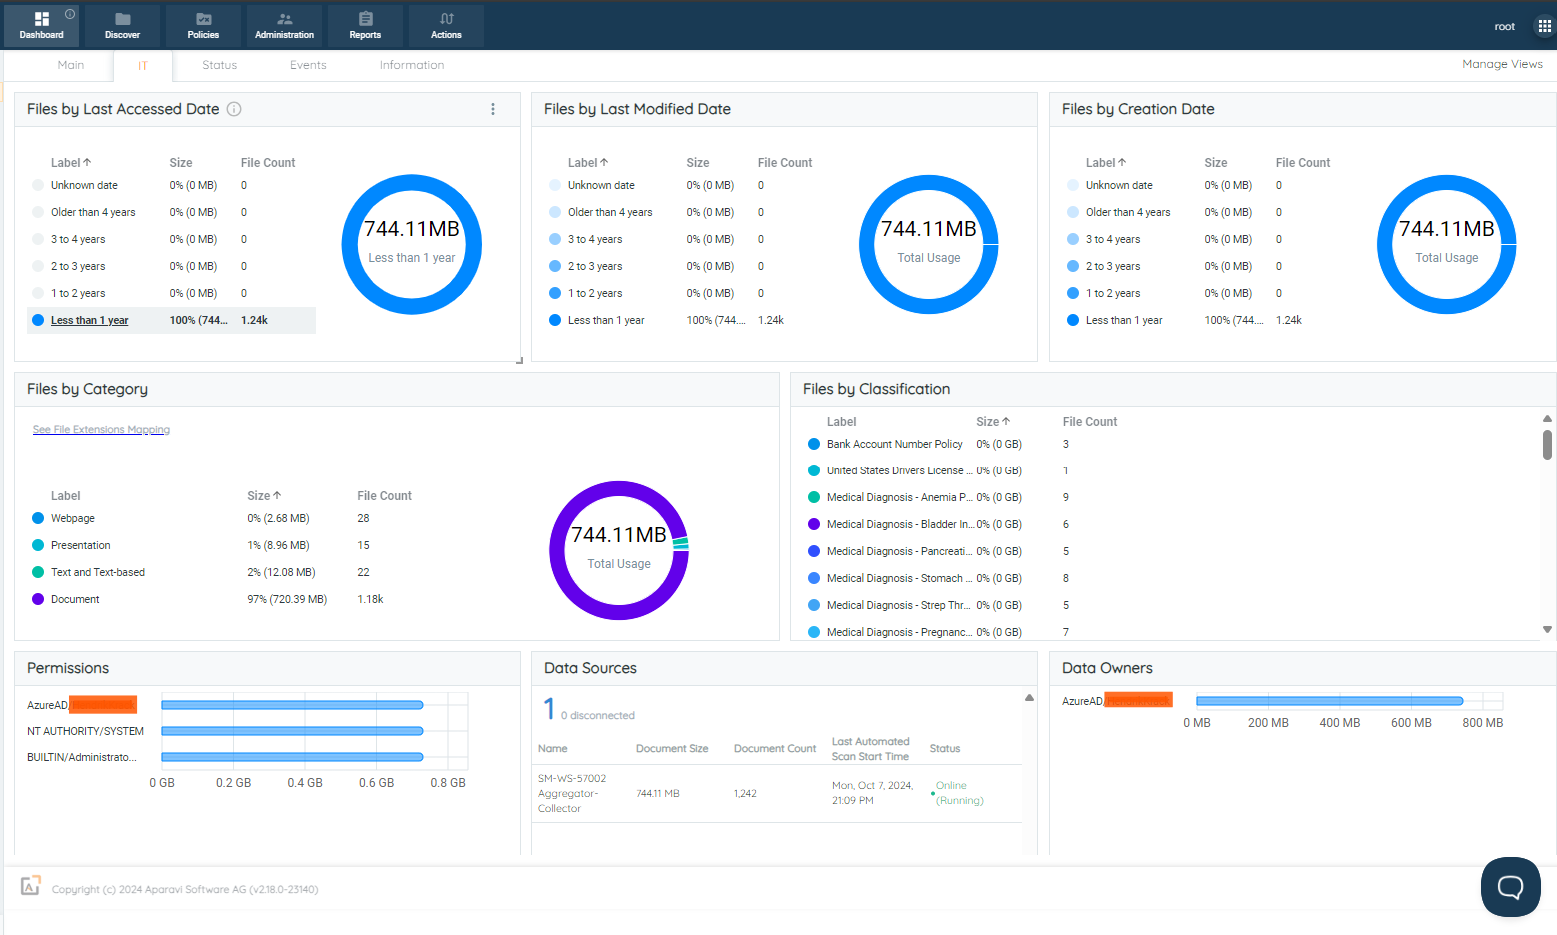

Make policies (add a note that this might take a while so people should be careful )

To better understand our data and to later seperate it - lets add some classifications. Click on the administrations tab and choose "add Classification" and "Predefined Classification"

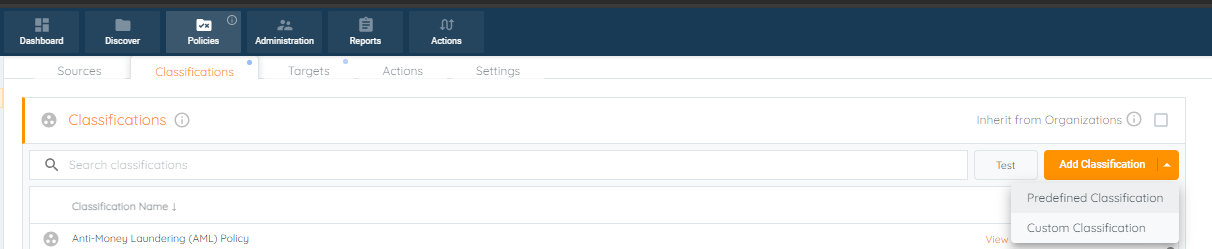

For this example lets just focus on the finantional documents. Choose "General Finance and click ok. Don't forget to safe your changes. HNow you can go back to the Status tab from before and pbselfe how the olicy engnne runs

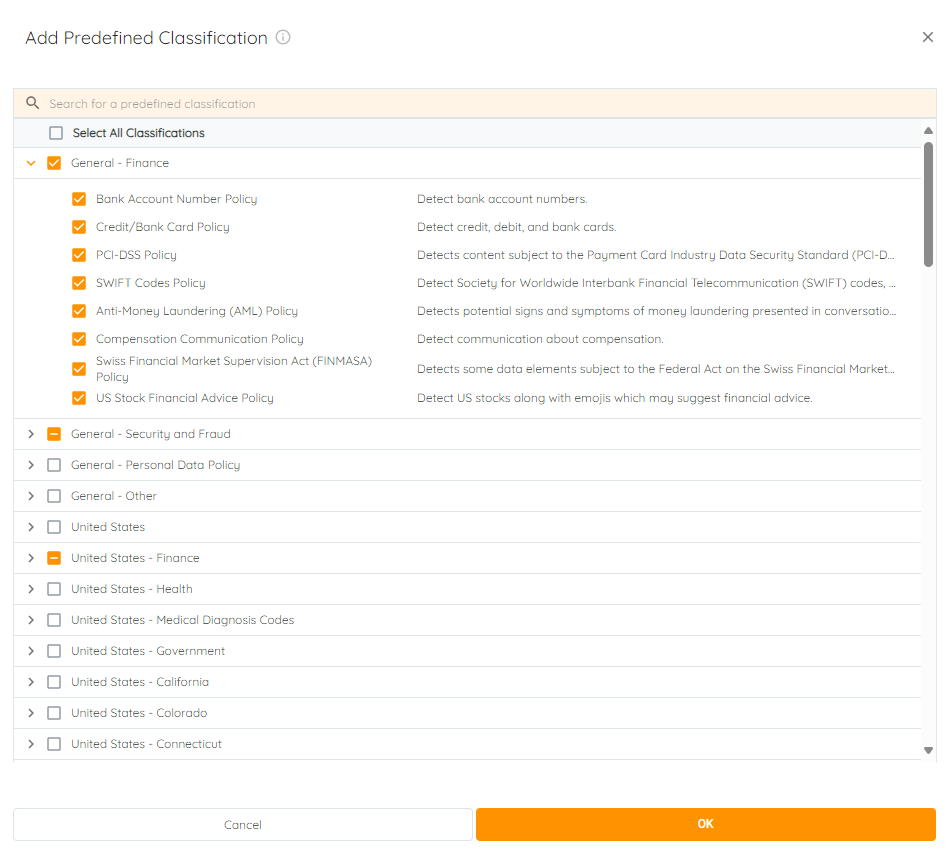



As well as the sensitive data and social security number picy

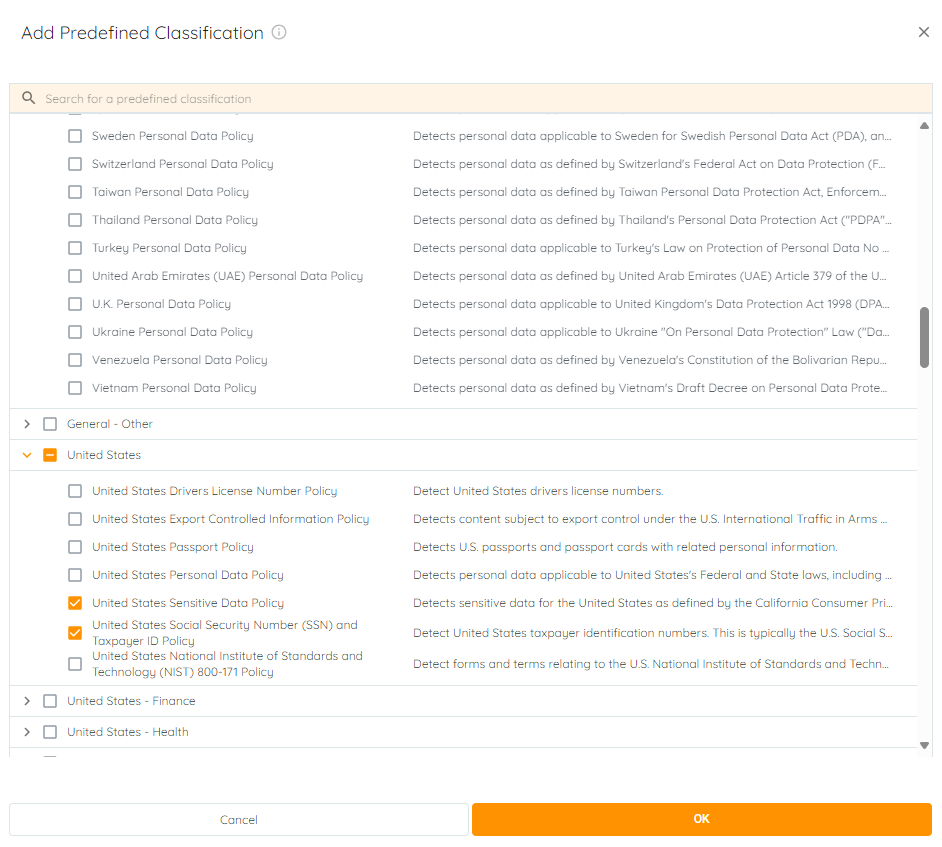



Let's creat some tags to make best use of our data 

go to the "administrations" tab and press "create tag" 

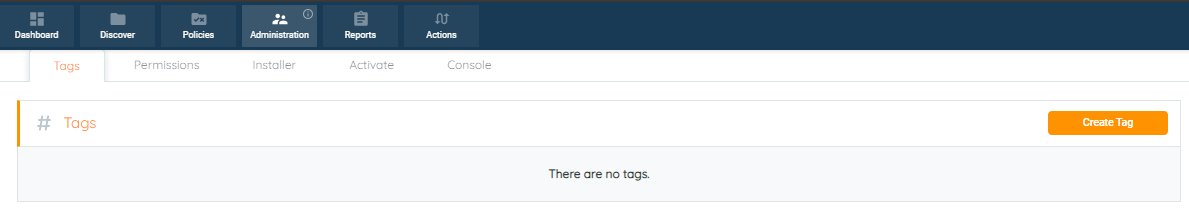



Let's create a tag to mark our financial documents 

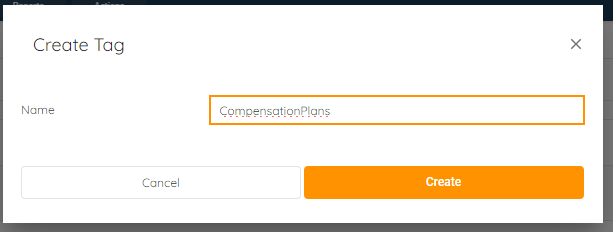

let's use the "Discover Tab" to udnerstand our data a little beter

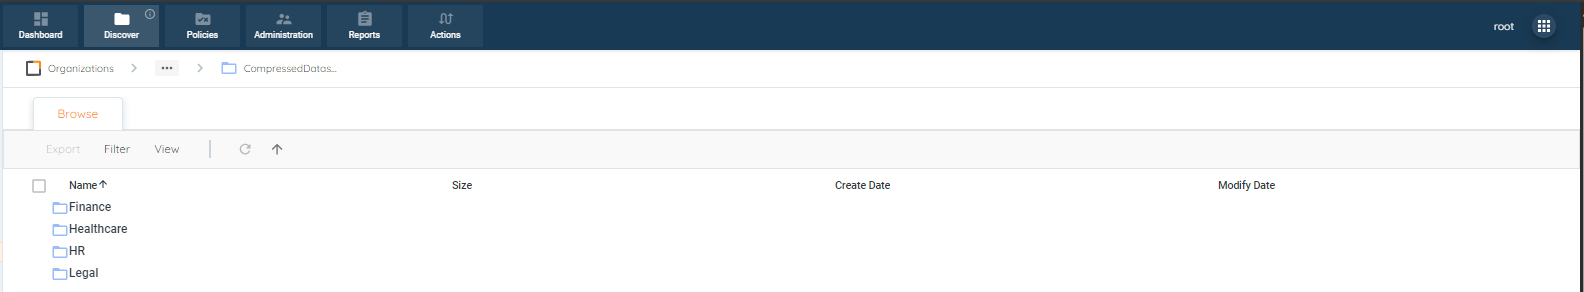

we can build quries to browse through the data 

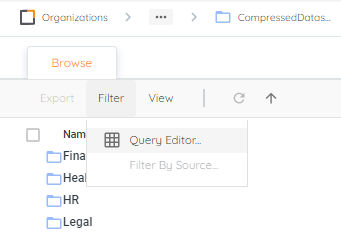

The Query builder lets us select from a variety of sources

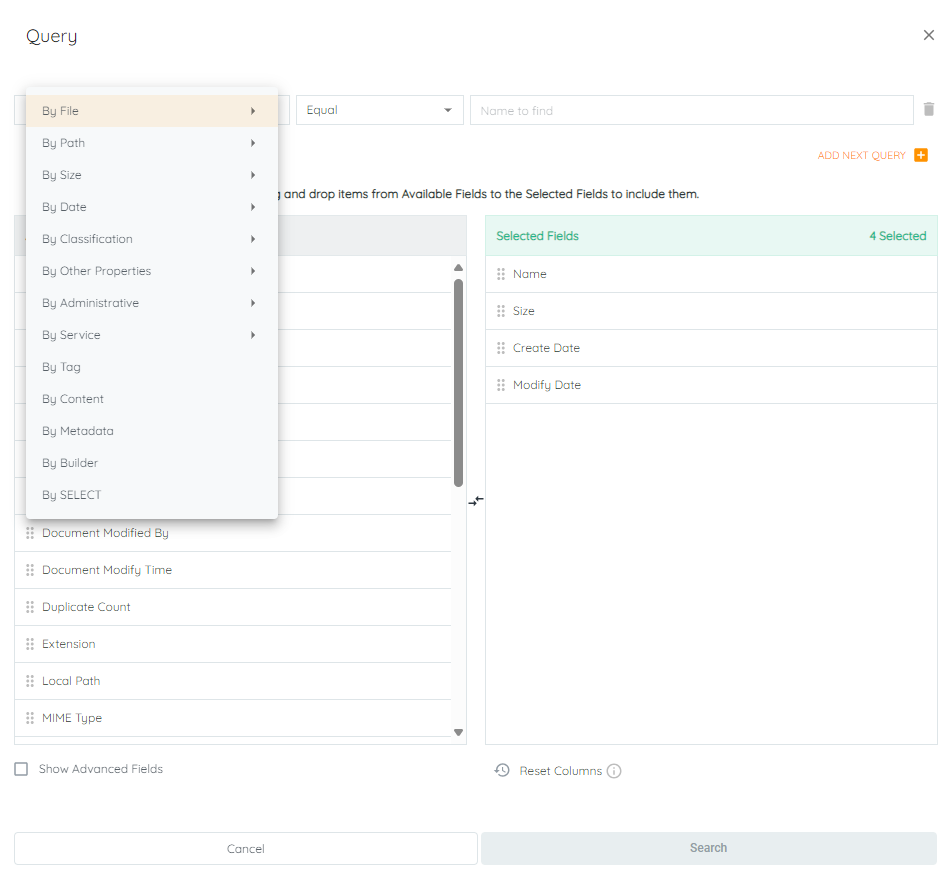

We want to filter our data for the financial documntation - there for lets hit the classifications tab

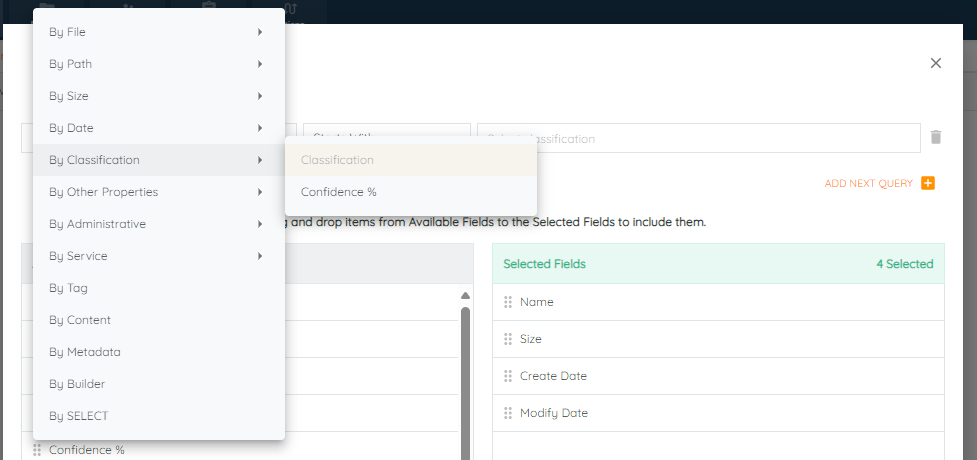

we build a simple query that was able to filter all company comminication documents and chat regarding communication of salary and compentasion

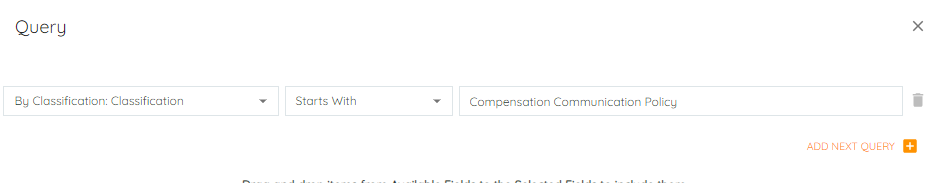

Once you execute that query and your results come up, you checkmark all items and richt clikc on a box to oben the tag option 

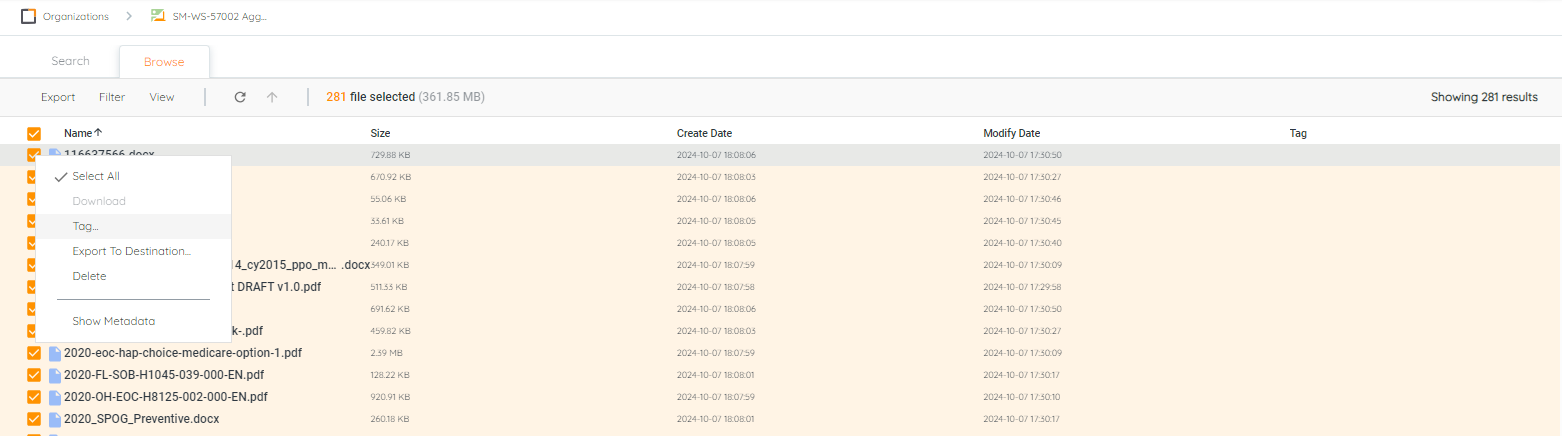

Select "Tag..." and hit okay. Your tags are now activated 

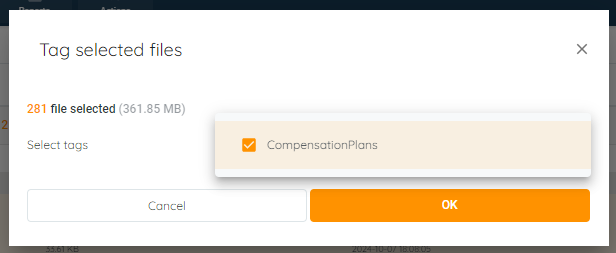

Now before we want to do anything with that data set lets make sure we don't have any sensitive data in there, lets add another query that entials "not Contains" and the Uniterd State Sensitive Data Policy adn click search

for this we select the query builder so we can build a sensitive application. 

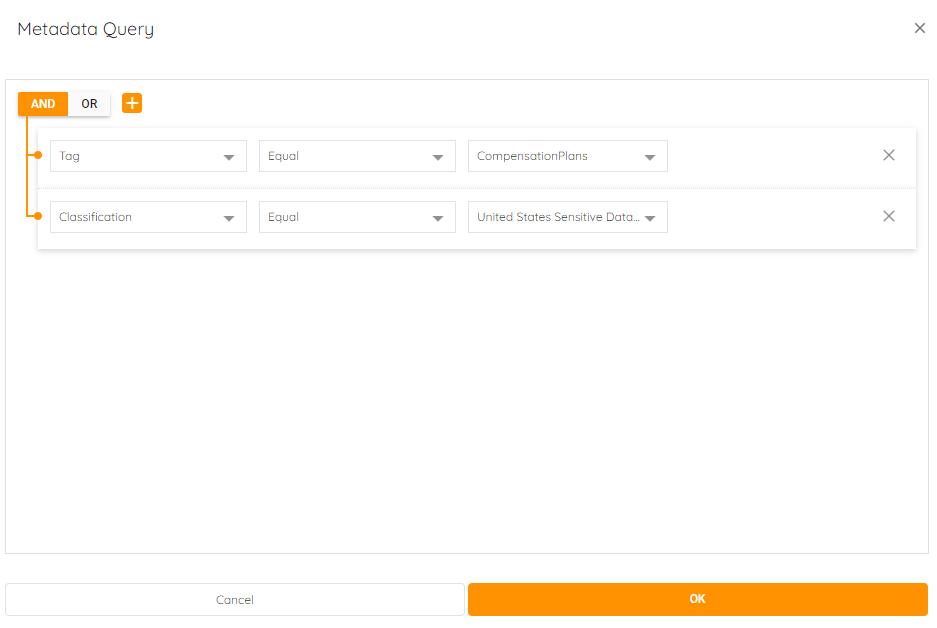


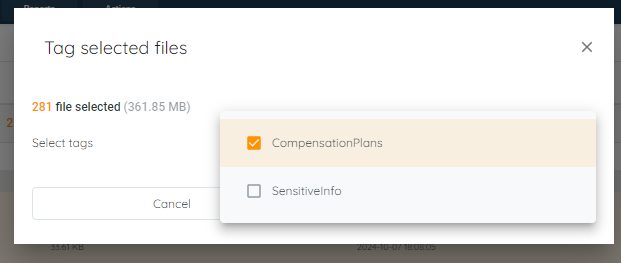

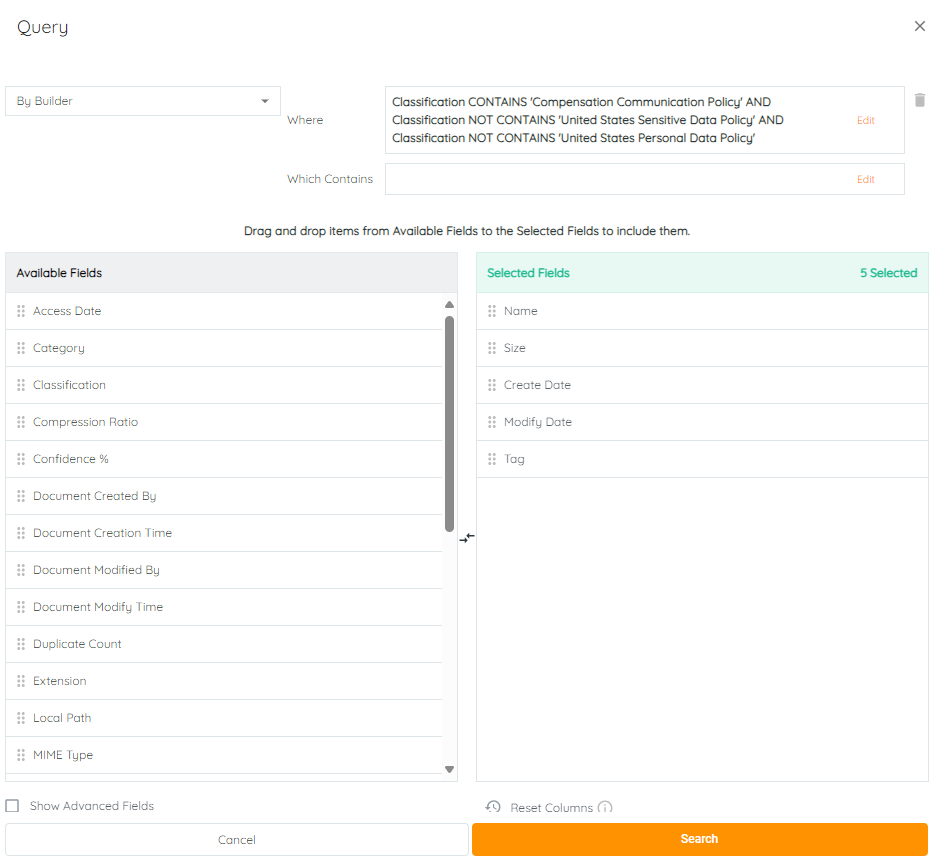

Add  integration 

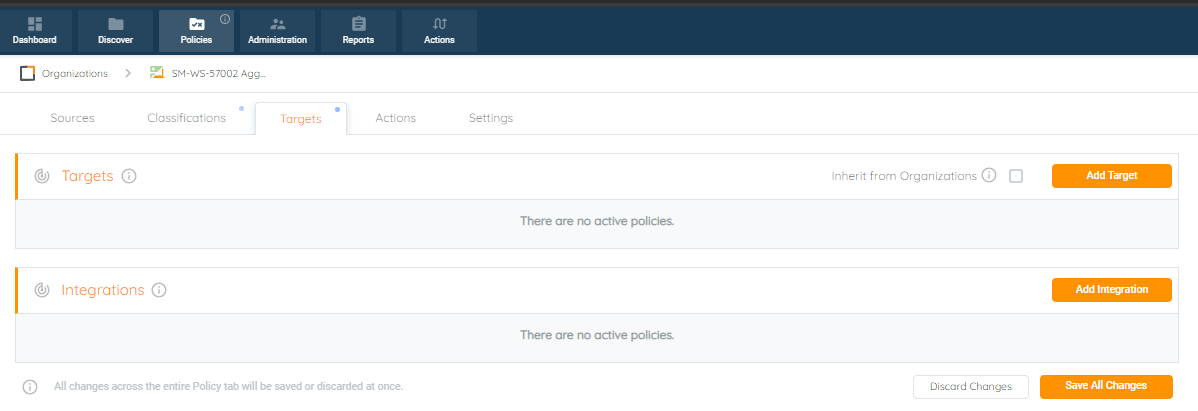

add integration type (here milvus)

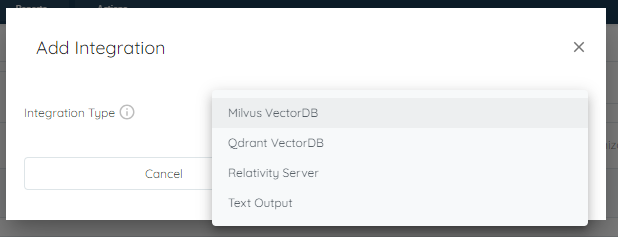



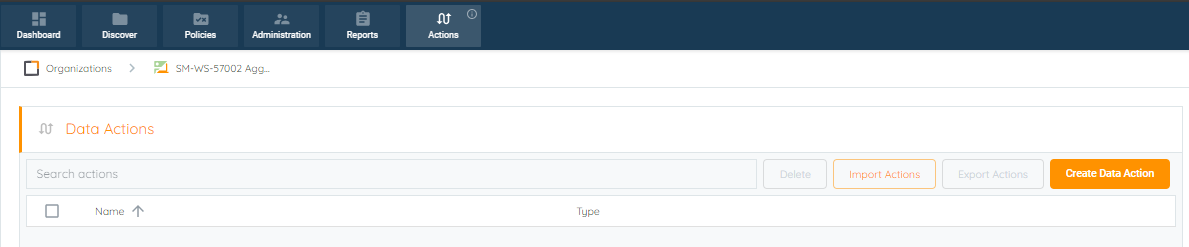

ad the parameters and press validate
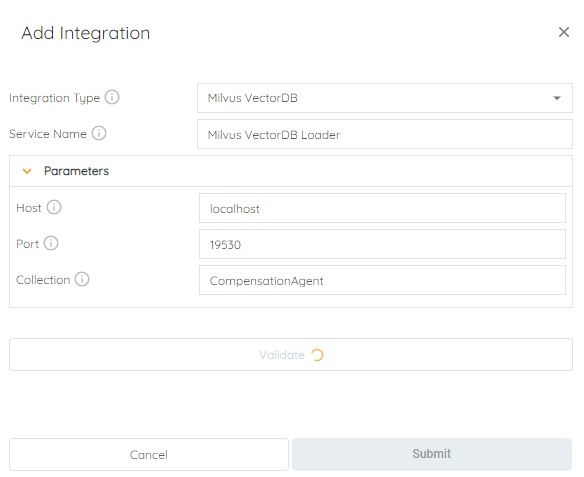

make sure to safe your changes

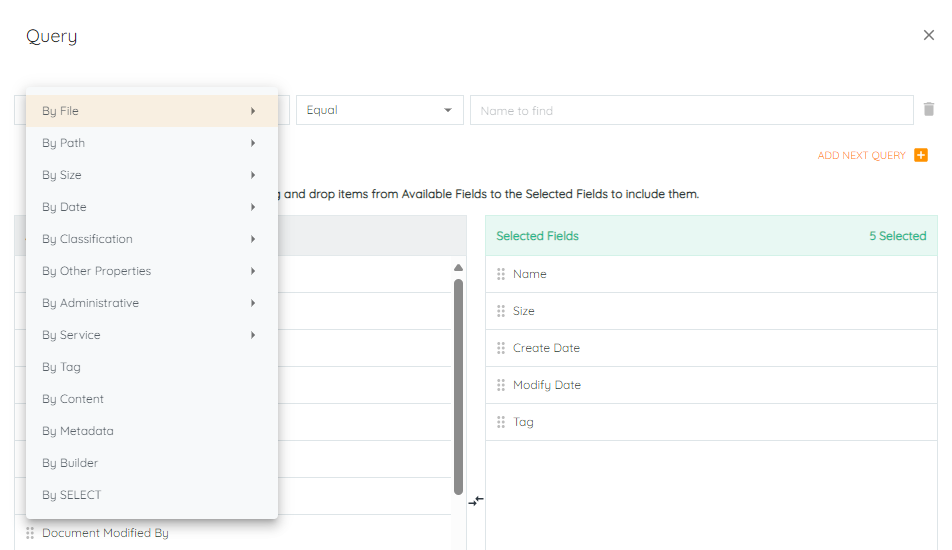

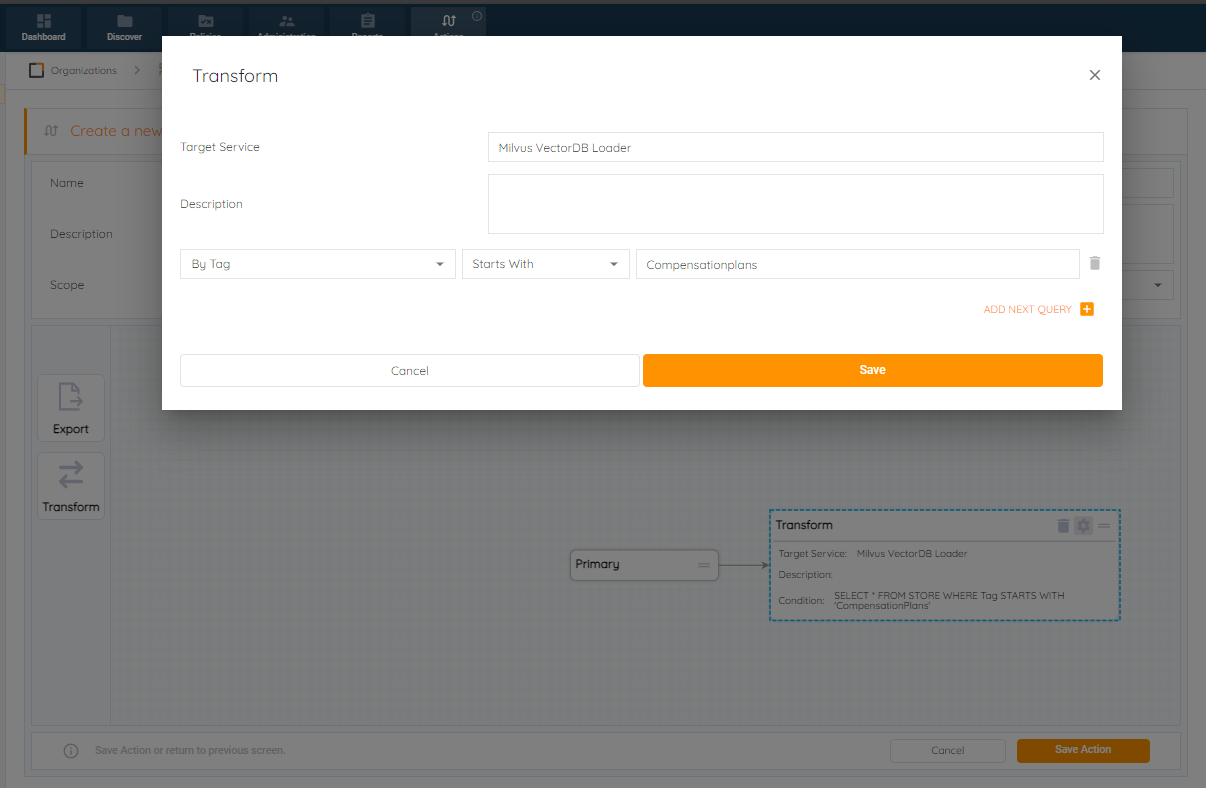

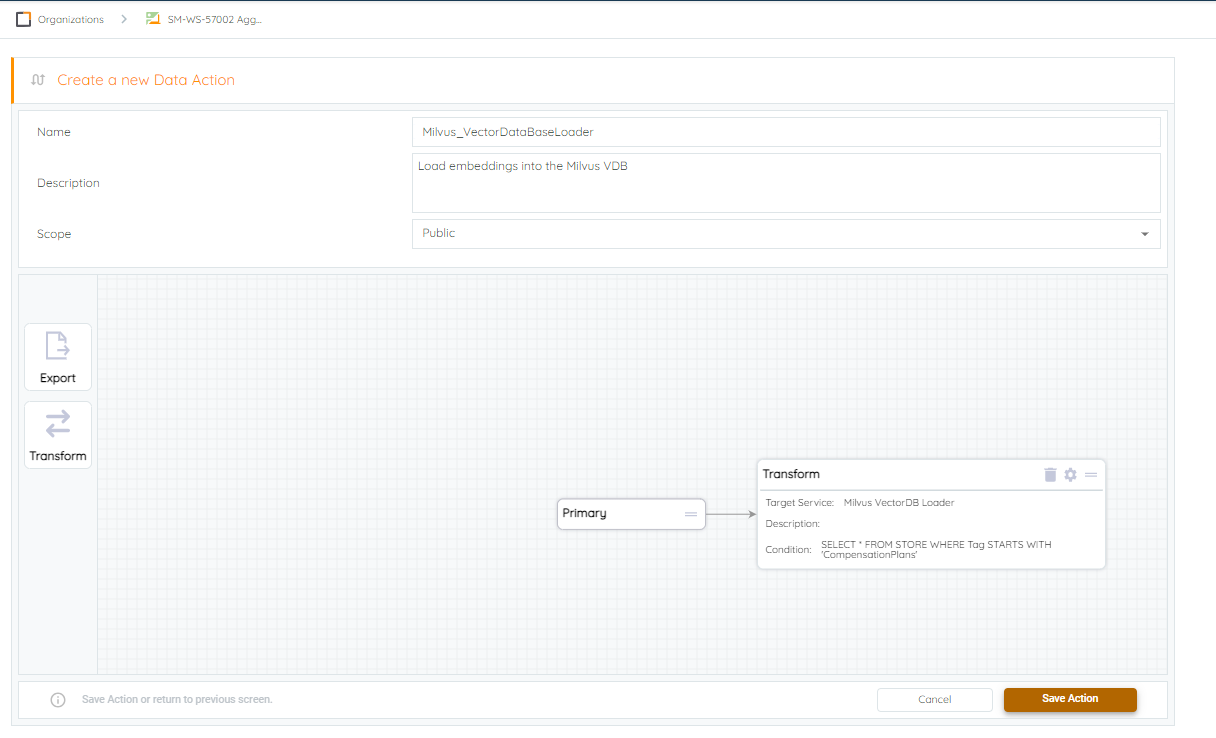

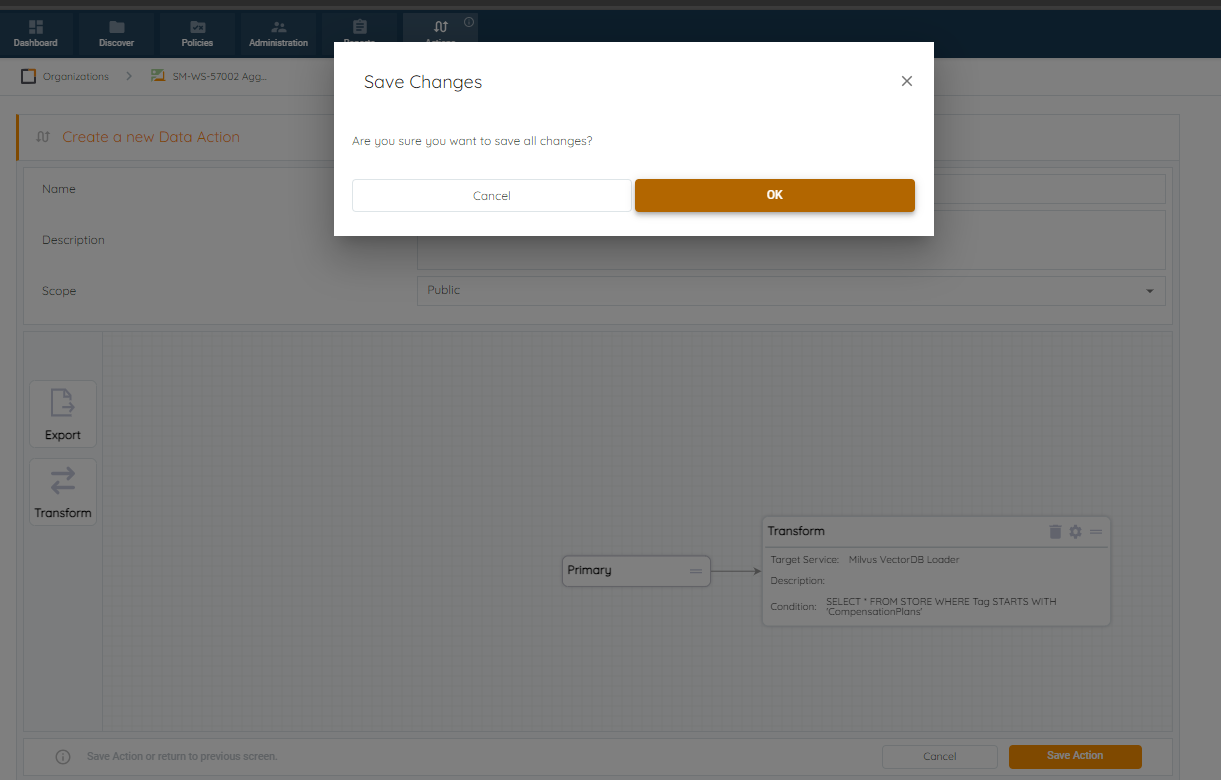

clickk run 

![image.png](attachment:image.png)

![image.png](attachment:image.png)

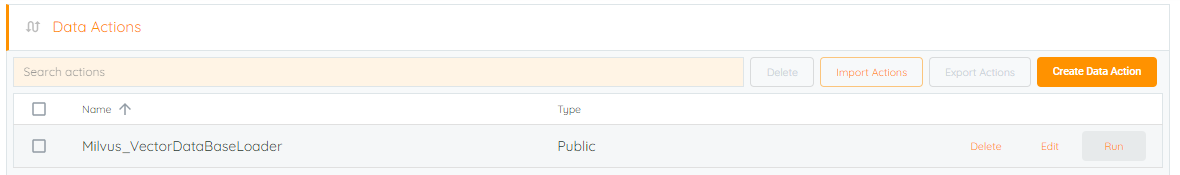

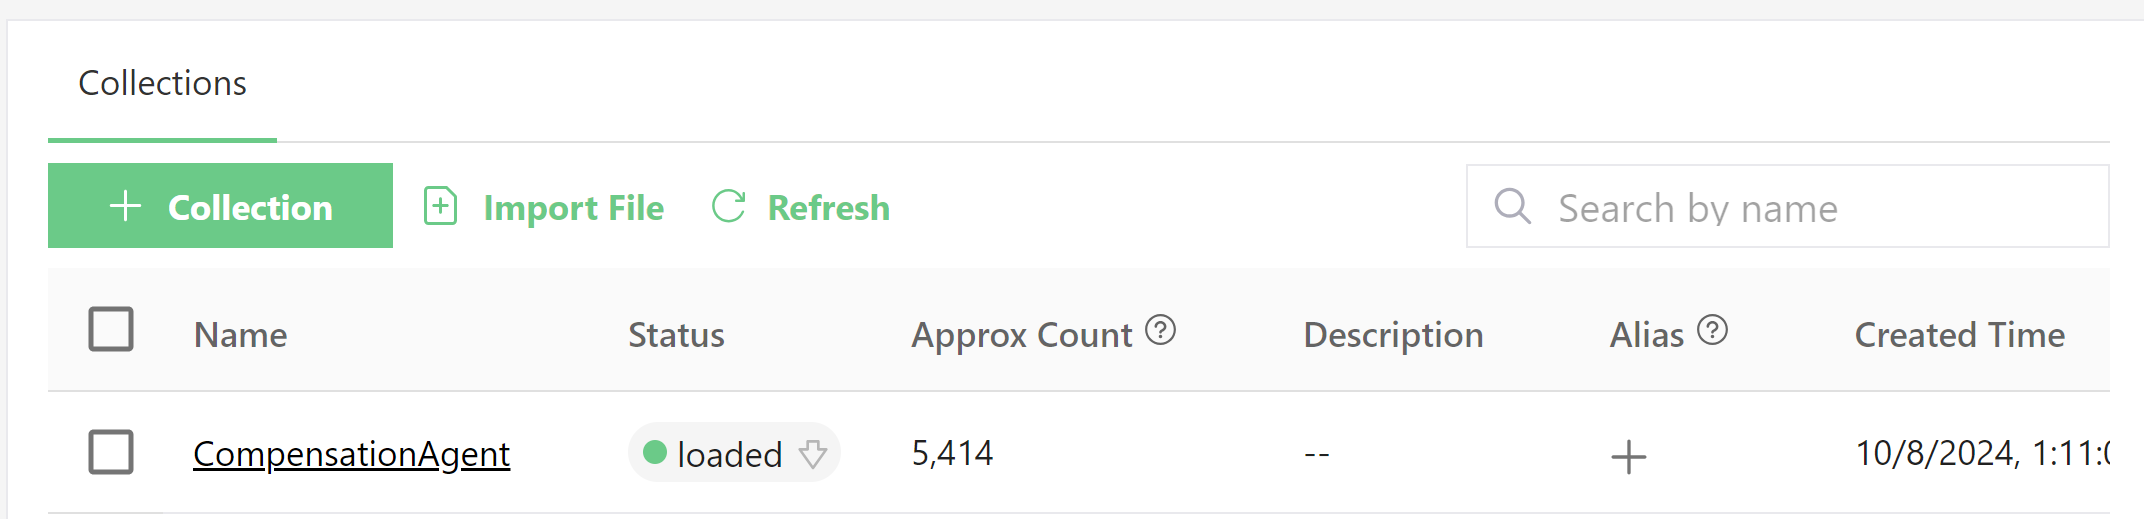

In [ ]:
%pip install pymilvus

In [1]:
from pymilvus import connections, utility, MilvusException, MilvusClient, DataType, Collection

In [2]:
# make a connection to the milvus localhost
uri=f"http://localhost:19530"

# Establish a connection // TODO: Revise alternative setup 
connections.connect(
    uri=uri 
)  

# Init the store
client = MilvusClient(
    uri = uri,
    timeout= 60
)

list all currently present collections & info

In [33]:
!pip freeze

anyio==4.4.0
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
asttokens==2.4.1
attrs==23.2.0
azure-core==1.30.1
azure-storage-blob==12.20.0
backoff==2.2.1
boilerpy3==1.0.7
cattrs==23.2.3
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.2
construct==2.5.3
contourpy==1.2.1
cryptography==42.0.7
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
docopt==0.6.2
environs==9.5.0
Events==0.5
executing==2.0.1
farm-haystack==1.25.5
filelock==3.14.0
fonttools==4.53.0
fsspec==2024.5.0
grpcio==1.64.1
grpcio-tools==1.64.1
h11==0.14.0
h2==4.1.0
haystack==0.42
hpack==4.0.0
httpcore==1.0.5
httpx==0.27.0
huggingface-hub==0.23.2
hyperframe==6.0.1
idna==3.7
inflect==7.2.1
intel-openmp==2021.4.0
ipykernel==6.29.4
ipython==8.24.0
isodate==0.6.1
jedi==0.19.1
Jinja2==3.1.4
joblib==1.4.2
jsonschema==4.22.0
jsonschema-specifications==2023.12.1
jupyter_client==8.6.2
jupyter_core==5.7.2
kaleido==0.2.1
kiwisolver==1.4.5
lazy-imports==0.3.1
MarkupSafe==2.1.5
marshmallow==

In [3]:

client.list_collections() 


['WebsiteTest', 'test', 'try', 'Student', 'Faculty']

In [19]:
client.describe_collection('APARAVI')

{'collection_name': 'APARAVI',
 'auto_id': False,
 'num_shards': 1,
 'description': '',
 'fields': [{'field_id': 100,
   'name': 'id',
   'description': '',
   'type': <DataType.INT64: 5>,
   'params': {},
   'is_primary': True},
  {'field_id': 101,
   'name': 'vector',
   'description': '',
   'type': <DataType.FLOAT_VECTOR: 101>,
   'params': {'dim': 384}},
  {'field_id': 102,
   'name': 'content',
   'description': '',
   'type': <DataType.VARCHAR: 21>,
   'params': {'max_length': 65535}},
  {'field_id': 103,
   'name': 'objectId',
   'description': '',
   'type': <DataType.VARCHAR: 21>,
   'params': {'max_length': 300}},
  {'field_id': 104,
   'name': 'nodeId',
   'description': '',
   'type': <DataType.VARCHAR: 21>,
   'params': {'max_length': 300}},
  {'field_id': 105,
   'name': 'parent',
   'description': '',
   'type': <DataType.VARCHAR: 21>,
   'params': {'max_length': 300}},
  {'field_id': 106,
   'name': 'permissionId',
   'description': '',
   'type': <DataType.INT64: 5>,


# TEST THE RENDER CHUNKS METHOD 

In [10]:
# settings filter 
objectId = "obj-2"
collection_name = 'APARAVI'

must_condition = []

# more parameters
i=0
renderChunkSize = 1000
# Since chunks are returned in any order, and a single objectId
# may contain tens of thousands of chunks, we grave them one
# group at a time (renderChunkSize), put them into an array,
# join them and call the callback
offset = 0


In [13]:
# do the rendering
while (True):

    # Build filter for getting a set of chunks within the offset range
    must_condition = f"objectId == '{objectId}' && chunk >= {offset} && chunk < {offset + renderChunkSize}"

    results = client.query(
        collection_name = collection_name,
        filter = must_condition
    )
    
    # Create a renderChunkSize array with empty
    # entries. This will allow us to join even when
    # a chunk doesn't come back
    # Process the results
    text = [''] * renderChunkSize
    lastIndex = -1

    for point in results:
        content = point['content']
        chunk = point['chunk']
        index = chunk - offset

        # Should never happen since we gave it an offset
        if chunk < offset:
            continue

        text[index] = content
        if index > lastIndex:
            lastIndex = index

    # Compute the number of items we are going to process
    numberOfItems = lastIndex + 1

    # If we got no items back, we are done
    if numberOfItems < 1:
        break

    # Join it together
    fullText = ''.join(text[0:numberOfItems])

    # Call the output function
    print('number',i,'text:',fullText)

    i = i+1 
    # If we got less than we asked for, must be done
    if (numberOfItems < renderChunkSize):
        break
    
    offset += renderChunkSize

In [14]:
print(fullText)

NameError: name 'fullText' is not defined

# TEST THE SEARCH FUNCTION

In [35]:
!python -c "import numpy; print(numpy.__version__)"

1.26.4


In [4]:
similarity = 'COSINE'
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/multi-qa-MiniLM-L6-cos-v1')
collection = 'Student'

c:\Users\HendrikKrack\AppData\Local\Programs\Python\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
c:\Users\HendrikKrack\AppData\Local\Programs\Python\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
query = "Wer ist Rauber Hotzenklotz?"



# Get the vectors
queryVectors = model.encode(query, show_progress_bar = False)

In [6]:
semantic=True
nodeId =None
parent = None
permissionId =  [-1]
isDeleted=False
offset=0
limit=10


In [7]:
from typing import List
from haystack.schema import Document

# Check it
if client == None:
    raise Exception('Client is not started')

# Declare the results list
results: List[Document] = []

# Declare the must list to start adding conditions
must_conditions = []
output_fields   = ['nodeId','parent','permissionId','isDeleted','chunk','content']

# If a parent was specified
if nodeId:
    must_conditions.append(f"nodeId == '{nodeId}'"),
    
# If a parent was specified
if parent:
    must_conditions.append(f"parent == '{parent}'")
    

# If a permissionId list was specified
if permissionId:
    permission_ids = ', '.join(map(str, permissionId))
    must_conditions.append(f"permissionId in [{permission_ids}]")
    

# If we are not going after deleted docs, add a condition
if not isDeleted:
    must_conditions.append("isDeleted == False")

# If we are doing a semantic search or not...
if semantic:
    # Optionally embed the query
    if query != None:
        embedding = model.encode(query)
else:
    # Check it
    if query == None:
        raise Exception('You must specify the keyword in the query')
    
    # Append it
    must_conditions.append(f"content like '%{query}%'")

# Combine all conditions into a single filter expression
filter_expression = ' and '.join(must_conditions) if must_conditions else None


if semantic:
    # Check it
    if embedding is None:
        raise Exception('Embedding not specified in search')
    
    # Perform the search
    points = client.search(
        collection_name=collection,
        data = embedding.reshape(1, -1),
        filter=filter_expression,
        limit=limit,
        output_fields=output_fields							
    )

    # Build the document list
    for scored in points[0]:
         #for scored in scoredList:
           #for scores in scored:# print(scored) 
                # Check it
                if not isinstance(scored, dict):
                    raise Exception('scored search is not a dictionary')

                if not isinstance(scored.get('id'), int):
                    raise Exception('scored id is not an integer')

                # Get the payload
                entity = scored.get('entity')
                if entity is None:
                    raise Exception('scored payload is not present')

                # Process the entity as needed
                content  = entity.get('content')
                meta = {
                    'parent': entity.get('parent'),
                    'chunk': entity.get('chunk'),
                    'objectId': entity.get('objectId'),
                    'nodeId': entity.get('nodeId')
                }

                doc = Document(
                    id=scored['id'],
                    content=content,
                    meta=meta # is that already all the meta data we need? id?
                )

                # If we are return scaled scores, build it TODO: CHECK IF THIS IS ALSO THE CASE FOR MILVUS (-1 to 1 range)
                if similarity == "COSINE":
                    doc.score = (scored.get('distance') + 1) / 2
                else:
                    doc.score = float(expit(scored.get('distance') / 100))

                # Ignore it if it doesn't have a high enough score
                if (doc.score < .20):
                    continue

                # Append it to the results
                results.append(doc)
else:

    # Perform the keyword solo  search
    points = client.query(
        collection_name=collection,
        filter=filter_expression,
        output_fields=output_fields,
    ) 
    

    # Now, add the documents to the results
    for point in points:
        print(point)
        # Ensure the point has the required fields
        if 'id' not in point or 'content' not in point or 'parent' not in point or 'chunk' not in point or 'objectId' not in point or 'nodeId' not in point:
            continue

        # Build the document
        doc = Document(
            id=point['id'],  # Assuming 'id' is now an integer
            content=point['content'],
            meta={
                'parent': point['parent'],
                'chunk': point['chunk'],
                'objectId': point['objectId'],
                'nodeId': point['nodeId']
            }
        )

        # Append it to the results
        results.append(doc)

PydanticSchemaGenerationError: Unable to generate pydantic-core schema for <class 'pandas.core.frame.DataFrame'>. Set `arbitrary_types_allowed=True` in the model_config to ignore this error or implement `__get_pydantic_core_schema__` on your type to fully support it.

If you got this error by calling handler(<some type>) within `__get_pydantic_core_schema__` then you likely need to call `handler.generate_schema(<some type>)` since we do not call `__get_pydantic_core_schema__` on `<some type>` otherwise to avoid infinite recursion.

For further information visit https://errors.pydantic.dev/2.9/u/schema-for-unknown-type

In [31]:
# print score
print(results)
print(scored)

[<Document: {'content': '\nClient #2 (Institutional) https://hedgefollow.com/funds/Renaissance+Technologies\nRENAISSANCE\nJim Simons | RENAISSANCE TECHNOLOGIES | Quant -shop\nFocus on growth\n$92B quant shop\nRENAISSANCE\nTECHNOLOGIES’ focus seems\nto be on “hot” growth stocks.\nSome of the holdings are in\npost IPO stocks that just had\ntheir floor debut.\nGeographic\ndiversification\nCompared to other domestic\nhedge funds - Jim Simons like\nto invest in growth stocks that\nhave their main operations\nbased abroad. Jim believes\nthat there is more growth in\nother countries than in the US -\nso that’s why he selects\ncompanies from different geo\nlocations.\nTeaching others.\nJim Simons is a world famous\nmathematician who founded\nRENAISSANCE\nTECHNOLOGIES. He taught\nmathematics at MIT and\nHarvard.\nhttps://hedgefollow.com/funds/Renaissance+Technologies Caption\nFocus on growth $92B quant shop\nGeographic diversification\nTeaching others.', 'content_type': 'text', 'score': 0.52549

# Test the flush function to seal the collection

In [54]:
from pymilvus import connections, Collection
# make a connection 
uri=f"http://localhost:19530"

# Establish a connection // TODO: Revise alternative setup 
connections.connect(
    uri=uri 
)
collectionInst = Collection(name="APARAVI_TEST")

collectionInst.flush()

client.get_collection_stats("APARAVI")

Do simple key word search

In [8]:
#parent = 'C:/Users/HendrikKrack/WorkBench/TextOutputConnector_Debug/aparavi-connectors/testdata/source/brunner22uwbwifi.pdf'
#filter_expression = f"parent == '{parent}'"
output_fields   = ['objectId','nodeId','parent','permissionId','isDeleted','chunk','content']


In [14]:
collection = 'Student'

# Perform the keyword solo  search
points = client.query(
    collection_name=collection,
    #filter=filter_expression,
    output_fields=output_fields,
    limit = 10
) 

In [15]:
print(points)

[{'isDeleted': False, 'chunk': 0, 'content': '\nAdd Authenticator App to Account with My Sign-Ins : Hult International Business School https://ef-hult.freshservice.com/support/solutions/articles/50000138943-add-authenticator-app-to-account-with-my-sign-ins\nAdd Authenticator App to Account with My Sign-Ins\nModified on: Mon, 6 Mar, 2023 3:25 PM\n1 of 4 9/14/2024, 5:33 PM\nAdd Authenticator App to Account with My Sign-Ins : Hult International Business School https://ef-hult.freshservice.com/support/solutions/articles/50000138943-add-authenticator-app-to-account-with-my-sign-ins\n2 of 4 9/14/2024, 5:33 PM\nAdd Authenticator App to Account with My Sign-Ins : Hult International Business School https://ef-hult.freshservice.com/support/solutions/articles/50000138943-add-authenticator-app-to-account-with-my-sign-ins\n3 of 4 9/14/2024, 5:33 PM\nAdd an Authenticator to Account with My Sign-Ins (https://app.tango.us/app/workflow/Add-an-Authenticator-to-Account-0aff71327775458cabdfbb3592ff412d)\n